In [1]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Створення даних з покупками для формування асоціативних правил
data = pd.DataFrame({
    'TransactionID': [1, 2, 3, 4, 5],
    'Items': [
        'milk, bread, apples',
        'bread, apples',
        'milk, bread',
        'bread, apples',
        'milk, bread, apples, eggs'
    ]
})

# Розділення списку даних на окремі елементи
data['Items'] = data['Items'].str.split(', ')

# Використання one-hot encoding для створення бінарних змінних для товарів
oht = data['Items'].str.join('|').str.get_dummies()

In [11]:
from mlxtend.frequent_patterns import apriori

# Застосування алгоритму Apriori для створення асоціативних правил
frequent_itemsets = apriori(oht, min_support=0.5, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

D:\Software\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
from mlxtend.frequent_patterns import fpgrowth

# Застосування алгоритму FP-growth для створення асоціативних правил
frequent_itemsets = fpgrowth(oht, min_support=0.5, use_colnames=True)
rules_fp_growth = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

D:\Software\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
# Оцінка якості асоціативних правил алгоритму Apriori
print("Асоціативні правила (Apriori):")
rules_apriori

Асоціативні правила (Apriori):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bread),(apples),1.0,0.8,0.8,0.8,1.0,0.0,1.0,0.0
1,(apples),(bread),0.8,1.0,0.8,1.0,1.0,0.0,inf,0.0
2,(milk),(bread),0.6,1.0,0.6,1.0,1.0,0.0,inf,0.0
3,(bread),(milk),1.0,0.6,0.6,0.6,1.0,0.0,1.0,0.0


In [10]:
# Оцінка якості асоціативних правил алгоритму Fp growth
print("Асоціативні правила (Fp growth):")
rules_fp_growth

Асоціативні правила (Fp growth):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bread),(apples),1.0,0.8,0.8,0.8,1.0,0.0,1.0,0.0
1,(apples),(bread),0.8,1.0,0.8,1.0,1.0,0.0,inf,0.0
2,(milk),(bread),0.6,1.0,0.6,1.0,1.0,0.0,inf,0.0
3,(bread),(milk),1.0,0.6,0.6,0.6,1.0,0.0,1.0,0.0


In [14]:
import time

# Оцінка часу виконання алгоритму Apriori
start_time_apriori = time.time()
frequent_itemsets = apriori(oht, min_support=0.1, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
end_time_apriori = time.time()
elapsed_time_apriori = end_time_apriori - start_time_apriori

# Оцінка часу виконання алгоритму Apriori
start_time_fp_growth = time.time()
frequent_itemsets = fpgrowth(oht, min_support=0.1, use_colnames=True)
rules_fp_growth = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
end_time_fp_growth = time.time()
elapsed_time_fp_growth = end_time_fp_growth - start_time_fp_growth

# Порівняти часові ресурси
print("Час виконання Apriori:", elapsed_time_apriori, "секунд")
print("Час виконання Fp growth:", elapsed_time_fp_growth, "секунд")

Час виконання Apriori: 0.01795196533203125 секунд
Час виконання Fp growth: 0.005981922149658203 секунд


D:\Software\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
D:\Software\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [20]:
# Пошук та видалення надлишкових асоціативних правил для алгоритму Apriori

# Визначення порогів для підтримки та впевненості
min_support_threshold = 0.5
min_confidence_threshold = 1.0

# Видалення надлишкових правил на основі порогів
filtered_rules_apriori = rules_apriori[(rules_apriori['support'] >= min_support_threshold) & (rules_apriori['confidence'] >= min_confidence_threshold)]

print("Відфільтровані правила:")
filtered_rules_apriori

Відфільтровані правила:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(apples),(bread),0.8,1.0,0.8,1.0,1.0,0.0,inf,0.0
6,(milk),(bread),0.6,1.0,0.6,1.0,1.0,0.0,inf,0.0


In [21]:
# Пошук та видалення надлишкових асоціативних правил для алгоритму Fp growth

# Видалення надлишкових правил на основі порогів
filtered_rules_fp_growth = rules_apriori[(rules_fp_growth['support'] >= min_support_threshold) & (rules_fp_growth['confidence'] >= min_confidence_threshold)]

print("Відфільтровані правила:")
filtered_rules_fp_growth

Відфільтровані правила:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(apples),(bread),0.8,1.0,0.8,1.0,1.00,0.00,inf,0.00
2,(eggs),(apples),0.2,0.8,0.2,1.0,1.25,0.04,inf,0.25


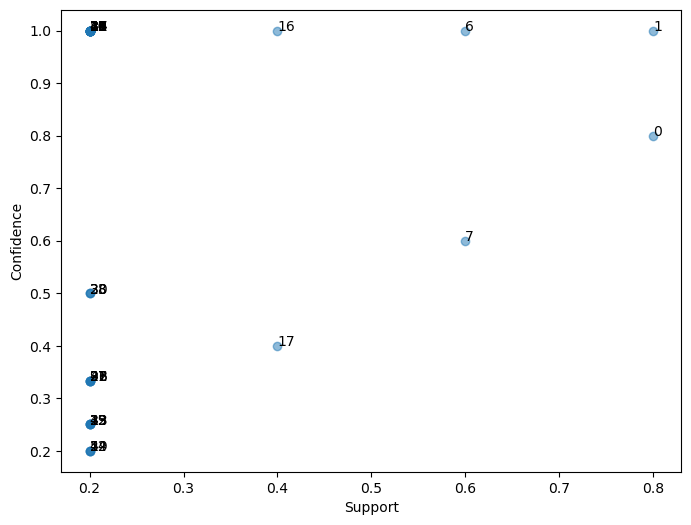


Чим ближче точки(асоціативні правила) до правого верхнього кута тим кращий взаємозвязок між Confidence та Support
і тим частіше ці асоціативні правила застосовуються


In [27]:
import matplotlib.pyplot as plt

# Візуалізація асоціативних правил на основі алгоритму Apriori

plt.figure(figsize=(8, 6))
plt.scatter(rules_apriori['support'], rules_apriori['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
for i, txt in enumerate(rules_apriori.index):
    plt.annotate(txt, (rules_apriori['support'][i], rules_apriori['confidence'][i]))
plt.show()

print('')
print('Чим ближче точки(асоціативні правила) до правого верхнього кута тим кращий взаємозвязок між Confidence та Support')
print('і тим частіше ці асоціативні правила застосовуються')

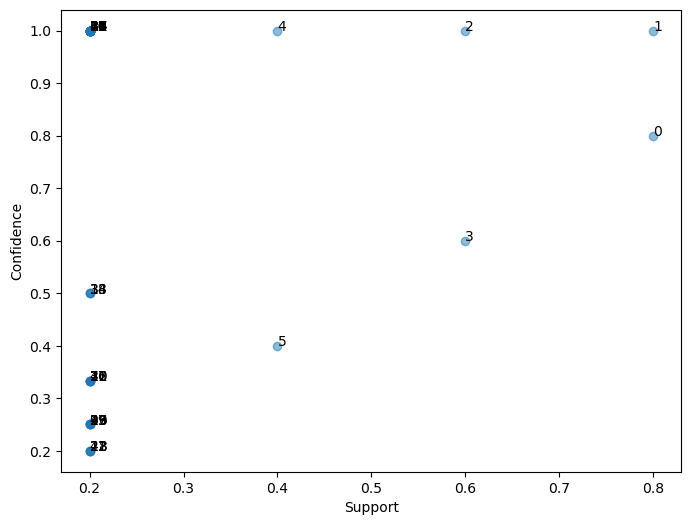


Чим ближче точки(асоціативні правила) до правого верхнього кута тим кращий взаємозвязок між Confidence та Support
і тим частіше ці асоціативні правила застосовуються


In [28]:
# Візуалізація асоціативних правил на основі алгоритму Fp growth

plt.figure(figsize=(8, 6))
plt.scatter(rules_fp_growth['support'], rules_fp_growth['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
for i, txt in enumerate(rules_fp_growth.index):
    plt.annotate(txt, (rules_fp_growth['support'][i], rules_fp_growth['confidence'][i]))
plt.show()

print('')
print('Чим ближче точки(асоціативні правила) до правого верхнього кута тим кращий взаємозвязок між Confidence та Support')
print('і тим частіше ці асоціативні правила застосовуються')